In [1]:
%load_ext autoreload 
%autoreload 2

# Initial exploration of full training LSTM simple 01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from src.modeling.prototyping.lstm_protype_simple import validated_tf
from src.modeling.prototyping.lstm_simple_initial_training import build_path

2023-06-07 15:05:00.549127: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-07 15:05:00.598623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 15:05:01.258725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Tensorflow spec

In [3]:
validated_tf()

TensorFlow version: 2.12.0
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


### model specs

In [4]:
LTSM_1_PATH = '/projects/p31961/dopamine_modeling/results/models/lstm_simple_initial_training_with_downsampling'

In [5]:
ltsm = tf.keras.models.load_model(LTSM_1_PATH)

2023-06-07 15:05:11.179502: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38222 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:06:00.0, compute capability: 8.0
2023-06-07 15:05:11.181264: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38222 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:2f:00.0, compute capability: 8.0
2023-06-07 15:05:11.778329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-06-07 15:05:11.778450: I tensorflow/core/common_runtime/executor.cc:1197] [/devic

In [6]:
ltsm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


* data was downsampled during preprocessing selecting every 100th data point

In [7]:
PATH_TO_DATA = '/projects/p31961/gaby_data/aggregated_data/data_pipeline/datasets'
X_test_path = build_path(PATH_TO_DATA, 'X_test_downsampled')
y_test_path = build_path(PATH_TO_DATA, 'y_test_downsampled')

In [8]:
X_test = pd.read_parquet(X_test_path)
y_test = pd.read_parquet(y_test_path)

In [60]:
concat = pd.concat([X_test, y_test], axis=1)
concat

,day,time,trial,event_cue,event_shock,sensor_D1,sensor_D2,sensor_DA,signal
0,6,-25.000000,0,0,0,1,0,0,0.888294
100,6,-24.803391,0,0,0,1,0,0,-0.121488
200,6,-24.606781,0,0,0,1,0,0,-0.867289
300,6,-24.410172,0,0,0,1,0,0,0.430867
400,6,-24.213562,0,0,0,1,0,0,-0.813157
...,...,...,...,...,...,...,...,...,...
22468,7,19.174240,0,0,1,0,0,1,0.569566
22568,7,19.370850,0,0,1,0,0,1,0.083356
22668,7,19.567459,0,0,1,0,0,1,1.474496
22768,7,19.764069,0,0,1,0,0,1,1.671521


In [10]:
predicted_signal = ltsm.predict(X_test)

2023-06-07 15:05:21.581808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 15:05:21.583169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 15:05:21.584303: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

   42/24776 [..............................] - ETA: 30s    

2023-06-07 15:05:22.542881: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
Could not load symbol cublasGetSmCountTarget from libcublas.so.11. Error: /home/mds8301/.conda/envs/dope/lib/libcublas.so.11: undefined symbol: cublasGetSmCountTarget


24776/24776 [==============================] - 31s 1ms/step


In [11]:
predicted_signal

array([[ 0.12558496],
       [ 0.12825464],
       [ 0.13097864],
       ...,
       [-0.2272882 ],
       [-0.22877534],
       [-0.2301132 ]], dtype=float32)

### reformating and data aggregation


In [20]:
def combine_data(df):
    cols_to_group = ['day', 'time', 'event_cue', 'event_shock', 'sensor_D1', 'sensor_D2', 'sensor_DA']
    agg_diict = {'true_signal': ['mean', 'sem'],
             'predicted_signal': ['mean', 'sem']
             }
    def flatten_df(df):
        df.columns = ['_'.join(col) for col in df.columns.values]
        df = df.reset_index()
        return df
    def strip_cols(df):
        df.columns = [col.rstrip('_') for col in df.columns]
        return df
    return(
        df.assign(
            true_signal=y_test, 
            predicted_signal=predicted_signal)
        .reset_index(drop=True)
        .groupby(by = cols_to_group, as_index = False).agg(agg_diict)
        .pipe(flatten_df)
        .pipe(strip_cols)
        .drop(columns = 'index')
    )

In [21]:
combined_data = combine_data(X_test)
combined_data


,day,time,event_cue,event_shock,sensor_D1,sensor_D2,sensor_DA,true_signal_mean,true_signal_sem,predicted_signal_mean,predicted_signal_sem
0,6,-25.0,0,0,0,0,1,-0.230563,0.594463,-0.002089,0.000536
1,6,-25.0,0,0,0,1,0,0.286432,0.085279,0.002604,0.026285
2,6,-25.0,0,0,1,0,0,0.874445,0.095851,0.051092,0.037247
3,6,-25.0,0,1,0,0,1,-0.653380,NaN,-0.164070,NaN
4,6,-25.0,1,0,0,0,1,-0.149271,0.468958,0.001302,0.005408
...,...,...,...,...,...,...,...,...,...,...,...
317466,7,20.0,0,0,1,0,0,-0.213200,0.351535,-0.007482,0.046520
317467,7,20.0,0,1,0,0,1,1.190402,NaN,-0.137767,NaN
317468,7,20.0,1,0,0,0,1,0.674438,0.433659,0.006966,0.052067
317469,7,20.0,1,0,0,1,0,-0.290045,0.956850,0.163795,0.053684


In [65]:

test_data = combined_data.query('day==6 & event_cue==0 & event_shock==1 & sensor_DA==1')
test_data.isna().sum()

day                         0
time                        0
event_cue                   0
event_shock                 0
sensor_D1                   0
sensor_D2                   0
sensor_DA                   0
true_signal_mean            0
true_signal_sem          5722
predicted_signal_mean       0
predicted_signal_sem     5722
dtype: int64

# Predicted vs true signal
* day 6
* shock
* dopamine

<Axes: xlabel='time', ylabel='true_signal_mean'>

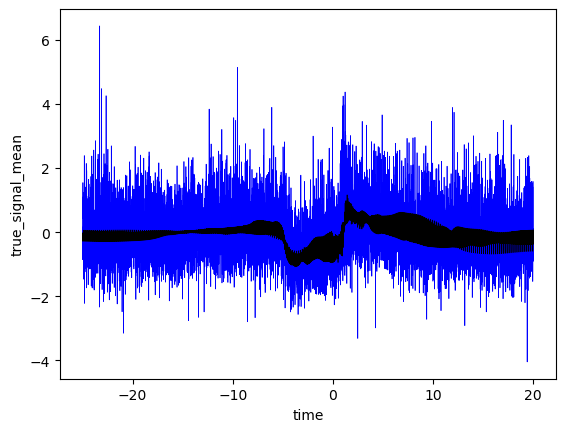

In [72]:
# sns.lineplot(data=test_data, x='time', y='true_signal_mean', color='blue')
sns.lineplot(data=test_data, x='time', y='true_signal_mean', color='blue', linewidth=0.5)
sns.lineplot(data=test_data, x='time', y='predicted_signal_mean', color='black', linewidth=0.5)
# plt.fill_between(test_data['time'], test_data['predicted_signal_mean'] - test_data['predicted_signal_sem'], test_data['predicted_signal_mean'] + test_data['predicted_signal_sem'], alpha=1, color='black')

# Summary 
the data is clearly incorrect. I think data is downsampled too much, I have preprocessed the data gain sampling every 10th data point and retrained to LSTM simple 02